In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification,pipeline
import emoji
import re
import html
import pandas as pd
pretrained_id = "mdhugol/indonesia-bert-sentiment-classification"
label_id = {'LABEL_0': 'positive', 'LABEL_1': 'neutral', 'LABEL_2': 'negative'}

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [ ]:
pip install --upgrade transformers accelerate

In [2]:
df = pd.read_csv('/kaggle/input/scraping-komang-2/scraping komang 2 - Sheet4.csv')
df2 = pd.read_csv('/kaggle/input/scraping-komang-3/scraping komang - Sheet3.csv')
df_fix = df.append(df2)
df_fix['Comment']

/tmp/ipykernel_104/1451526155.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_fix = df.append(df2)


0       dengarkan juga vidio klip Snag Badut Raim Laod...
1                                          keren kao bang
2                                              Specless ❤
3          Terima kasih kerana membawa lagu ini ke dunia.
4       Video wedding yg ditonton se Indonesia. Semoga...
                              ...                        
3245                                         2 tahun lalu
3246                                               Mantap
3247    Nggak pernah bosen dengerin lagu ini syair &am...
3248                                             The best
3249    Best lagunya bang, Keren sangat. Beneran, mema...
Name: Comment, Length: 7453, dtype: object

# cleaning text

In [ ]:
pip install sastrawi

In [3]:
import string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

def preprocess_tweet(tweet):
    tweet = tweet.lower() #Merubah format teks menjadi format huruf kecil semua (lowercase).
    # Remove HTML tags
    tweet = re.sub(r'<.*?>', '', tweet)
    # Remove URLs
    tweet = re.sub(r'http\S+', '', tweet)
    # Remove www URLs
    tweet = re.sub(r'www.\S+', '', tweet)

    #Menghapus karakter angka.
    tweet = re.sub('[^A-Za-z]+', ' ', str(tweet)) 
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    tweet = tweet.strip()
    
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    tweet = stemmer.stem(tweet)
    return tweet
df_fix['Cleaned Comment'] = df_fix['Comment'].apply(preprocess_tweet)
df_fix.head()

,Name,Comment,Time,Likes,Reply Count,Cleaned Comment
0,Raim Laode,dengarkan juga vidio klip Snag Badut Raim Laod...,2023-04-01T06:30:34Z,368,30,dengar juga vidio klip snag badut raim laode
1,Randomica,keren kao bang,2023-05-02T03:34:05Z,1,0,keren kao bang
2,hidayat Nrd,Specless ❤,2023-05-01T20:02:23Z,1,0,specless
3,G Entity,Terima kasih kerana membawa lagu ini ke dunia.,2023-05-01T15:07:38Z,1,0,terima kasih rana bawa lagu ini ke dunia
4,wirawan wicaksono,Video wedding yg ditonton se Indonesia. Semoga...,2023-05-01T14:55:27Z,1,0,video wedding yg tonton se indonesia moga jadi...


In [ ]:
df_fix

In [4]:
from nltk.corpus import stopwords

# get Indonesian stopword 
list_stopwords = set(stopwords.words('indonesian'))
def remove_short_words(tweet):
     # split the text into words
        words = tweet.split()
        # filter out words with less than 2 characters
        words = [word for word in words if len(word) > 3]
        tokens_without_stopword = [word for word in words if not word in list_stopwords]
        # join the remaining words into a string
        tweet = ' '.join(tokens_without_stopword)
        return tweet
df_fix1 = df_fix.copy()
df_fix1['Cleaned Comment'] = df_fix1['Cleaned Comment'].apply(remove_short_words)
df_fix1

,Name,Comment,Time,Likes,Reply Count,Cleaned Comment
0,Raim Laode,dengarkan juga vidio klip Snag Badut Raim Laod...,2023-04-01T06:30:34Z,368,30,dengar vidio klip snag badut raim laode
1,Randomica,keren kao bang,2023-05-02T03:34:05Z,1,0,keren bang
2,hidayat Nrd,Specless ❤,2023-05-01T20:02:23Z,1,0,specless
3,G Entity,Terima kasih kerana membawa lagu ini ke dunia.,2023-05-01T15:07:38Z,1,0,terima kasih rana bawa lagu dunia
4,wirawan wicaksono,Video wedding yg ditonton se Indonesia. Semoga...,2023-05-01T14:55:27Z,1,0,video wedding tonton indonesia moga keluarga s...
...,...,...,...,...,...,...
3245,Nyak All,2 tahun lalu,2023-02-22T07:00:31Z,1,0,
3246,MISWAR - MDM Official,Mantap,2023-02-22T07:00:02Z,1,0,mantap
3247,lies eka,Nggak pernah bosen dengerin lagu ini syair &am...,2023-02-22T06:57:43Z,56,0,nggak bosen dengerin lagu syair lagu nggak rag...
3248,Fiqri Adji prayogo,The best,2023-02-22T06:54:47Z,1,0,best


In [5]:
df_fix1.to_csv('file_cleaning.csv')

In [6]:
tokenizer = AutoTokenizer.from_pretrained(pretrained_id)
model = AutoModelForSequenceClassification.from_pretrained(pretrained_id)
sentiment_analysis = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [7]:
bacaan = []
label = []
nilai = []
for i in range(0,len(df_fix1['Cleaned Comment'])):
    #text = preprocess_tweet()
    text = df_fix1['Cleaned Comment'].iloc[i]
    result = sentiment_analysis(text)
    status = label_id[result[0]['label']]
    score = result[0]['score']
    bacaan.append(text)
    label.append(status)
    nilai.append(score)
df_hasil = pd.DataFrame({'Text':bacaan,'status':label,'score':nilai})
df_hasil

,Text,status,score
0,dengar vidio klip snag badut raim laode,neutral,0.685589
1,keren bang,positive,0.996982
2,specless,negative,0.882115
3,terima kasih rana bawa lagu dunia,positive,0.913573
4,video wedding tonton indonesia moga keluarga s...,positive,0.688739
...,...,...,...
7448,,positive,0.942866
7449,mantap,positive,0.997200
7450,nggak bosen dengerin lagu syair lagu nggak rag...,positive,0.994969
7451,best,positive,0.996504


/tmp/ipykernel_104/4234888499.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax2.pie(df_hasil.groupby(['status']).sum().reset_index()['score'].sort_values(ascending=False), explode=explode,


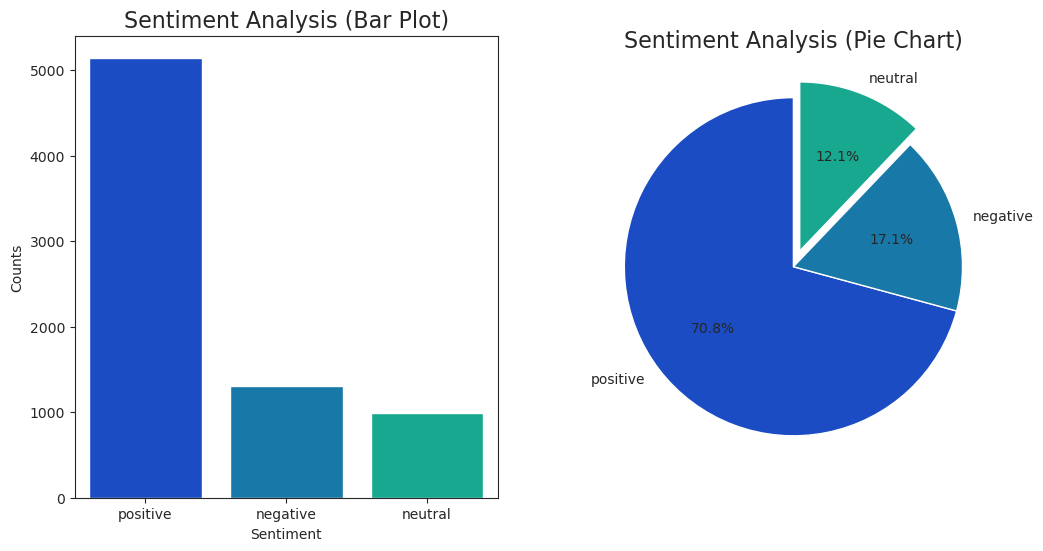

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('ticks')  # set background color to white
sns.set_palette('pastel')  # set palette color to 'pastel'

# membuat figure dan 2 axes
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# menggambar bar plot di axes pertama
sns.countplot(x=df_hasil["status"],ax=ax1,palette='winter',order=df_hasil["status"].value_counts().index)
ax1.set_title('Sentiment Analysis (Bar Plot)', fontsize=16)
ax1.set_xlabel('Sentiment')
ax1.set_ylabel('Counts')

# menggambar pie chart di axes kedua

explode = (0, 0, 0.1)  # memberikan efek explode pada slice pertama
ax2.pie(df_hasil.groupby(['status']).sum().reset_index()['score'].sort_values(ascending=False), explode=explode, 
        labels=['positive','negative','neutral'], autopct='%1.1f%%',
        startangle=90,colors=['#1c4cc3','#1878a7','#18a88f'])
ax2.set_title('Sentiment Analysis (Pie Chart)', fontsize=16)

# menampilkan figure
plt.show()

In [9]:
# I created the following data frame as a benchmark as ready-clean data 
clean_df = pd.DataFrame(df_hasil['Text'].tolist(), columns=['reviews'])
clean_df

,reviews
0,dengar vidio klip snag badut raim laode
1,keren bang
2,specless
3,terima kasih rana bawa lagu dunia
4,video wedding tonton indonesia moga keluarga s...
...,...
7448,
7449,mantap
7450,nggak bosen dengerin lagu syair lagu nggak rag...
7451,best


In [10]:
remove_short_words = lambda s: ' '.join(filter(lambda w: len(w) > 3, s.split()))

# apply the function to the 'text' column of the DataFrame
clean_df['reviews'] = clean_df['reviews'].apply(remove_short_words)

# print the updated DataFrame
clean_df

,reviews
0,dengar vidio klip snag badut raim laode
1,keren bang
2,specless
3,terima kasih rana bawa lagu dunia
4,video wedding tonton indonesia moga keluarga s...
...,...
7448,
7449,mantap
7450,nggak bosen dengerin lagu syair lagu nggak rag...
7451,best


# Word Analysis

In [15]:
# initiate object to  CountVectorizer
vectorizer = CountVectorizer()

# transform data to vector
X = vectorizer.fit_transform(clean_df['reviews'])

# caunting how many the word appear then sorted descending order
word_counts = dict(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0]))
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# print the top ten the word that appears the most in the review just for checking
print(sorted_word_counts[:10])

[('lagu', 2478), ('raim', 1284), ('bang', 1180), ('komang', 923), ('indah', 798), ('keren', 654), ('video', 602), ('moga', 566), ('banget', 511), ('karya', 448)]


In [16]:
#Save them on pandas data frame
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
df_word_counts = pd.DataFrame(sorted_word_counts, columns=['Word', 'Frequency'])
df_word_counts.head(10)

,Word,Frequency
0,lagu,2478
1,raim,1284
2,bang,1180
3,komang,923
4,indah,798
5,keren,654
6,video,602
7,moga,566
8,banget,511
9,karya,448


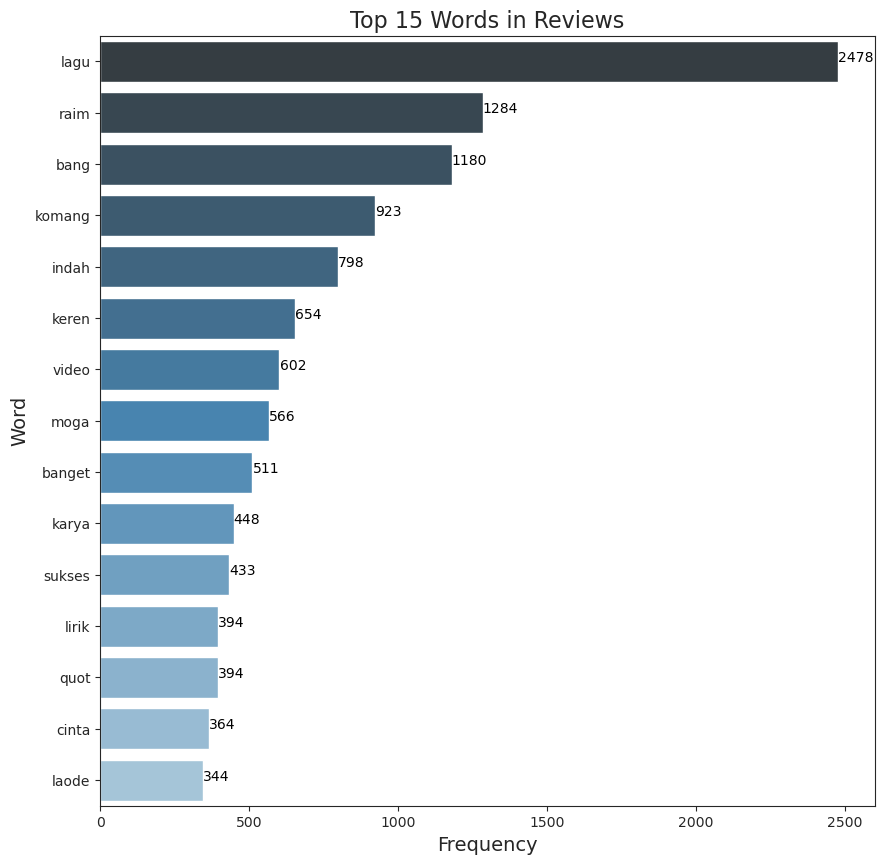

In [32]:
plt.figure(figsize=(10,10))
# setting how many rows or data will be visualized
top_words = df_word_counts.nlargest(15, 'Frequency')
sns.barplot(x='Frequency', y='Word', data=top_words, palette= sns.color_palette("Blues_d", n_colors=15)[::-1])
plt.ylabel('Word', fontsize=14)
plt.xlabel('Frequency', fontsize=14)
plt.title('Top 15 Words in Reviews', fontsize=16)
# Give anotation number for every bar
for i, v in enumerate(top_words['Frequency']):
    plt.text(v + 0.5, i, str(v), color='black', fontsize=10)
plt.savefig('top 15 word.png')

# Bigrams Analysis

In [18]:
import re
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing text
clean_df['clean_reviews'] = clean_df['reviews'].apply(lambda x: re.sub(r'[^\w\s]','',x.lower()))

# Tokenization
clean_df['tokens'] = clean_df['clean_reviews'].apply(lambda x: x.split())

# Bigram
clean_df['bigrams'] = clean_df['tokens'].apply(lambda x: [x[i] + " " + x[i+1] for i in range(len(x)-1)])

# Counting bigram frequency
bigram_freq = Counter([item for sublist in clean_df['bigrams'] for item in sublist])

# Creating DataFrame for top 15 bigrams
bigrams_df = pd.DataFrame(bigram_freq.most_common(), columns=['Bigram', 'Frequency'])
bigrams_df.head(15)

,Bigram,Frequency
0,bang raim,422
1,raim laode,282
2,lagu indah,157
3,video klip,134
4,raim komang,125
5,terima kasih,122
6,masya allah,119
7,banget lagu,93
8,sukses bang,92
9,keren bang,87


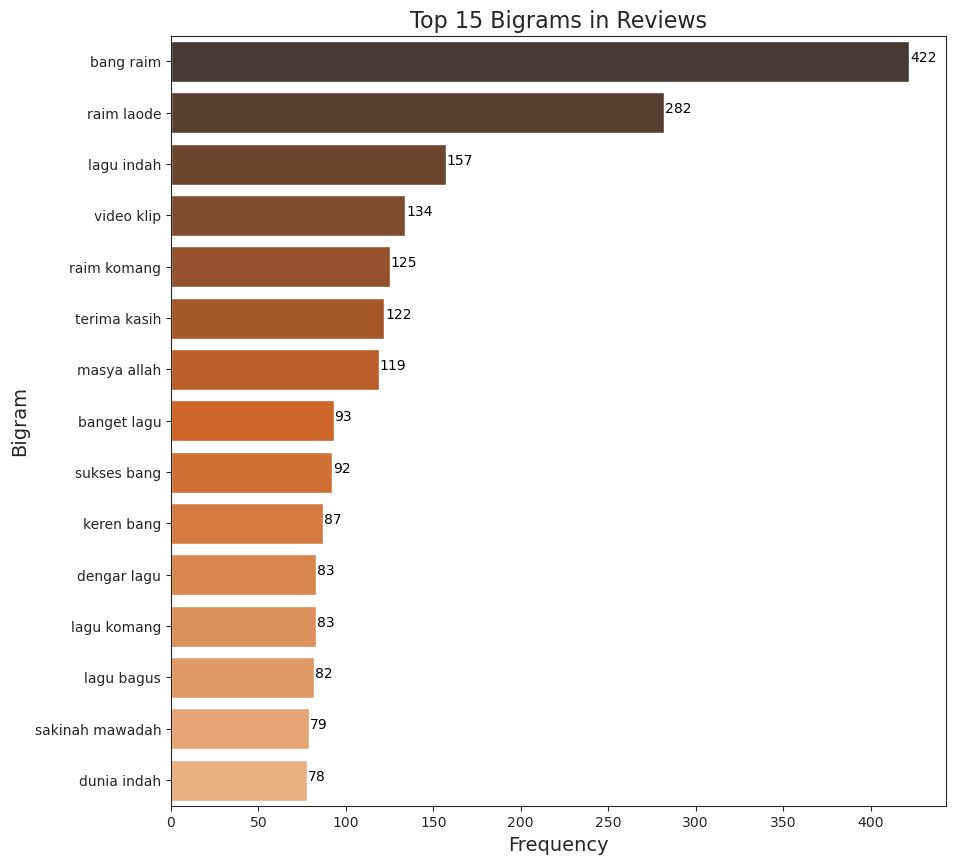

In [33]:
plt.figure(figsize=(10,10))
top_bigrams = bigrams_df.nlargest(15, 'Frequency')
sns.barplot(x='Frequency', y='Bigram', data=top_bigrams, palette= sns.color_palette("Oranges_d", n_colors=15)[::-1])
plt.ylabel('Bigram', fontsize=14)
plt.xlabel('Frequency', fontsize=14)
plt.title('Top 15 Bigrams in Reviews', fontsize=16)
# Give anotation number for every bar
for i, v in enumerate(top_bigrams['Frequency']):
    plt.text(v + 0.5, i, str(v), color='black', fontsize=10)
plt.savefig('top 15 bigrams.png')

# Trigrams analysis

In [20]:
from collections import defaultdict
TrigramValues3=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [21]:
def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ")]  
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

In [22]:
#get the count of every word in both the columns of df_train and df_test dataframes
for text in df_hasil.Text:
  for word in generate_N_grams(text,3):
    TrigramValues3[word]+=1

Sentence after removing stopwords: ['dengar', 'vidio', 'klip', 'snag', 'badut', 'raim', 'laode']
Sentence after removing stopwords: ['keren', 'bang']
Sentence after removing stopwords: ['specless']
Sentence after removing stopwords: ['terima', 'kasih', 'rana', 'bawa', 'lagu', 'dunia']
Sentence after removing stopwords: ['video', 'wedding', 'tonton', 'indonesia', 'moga', 'keluarga', 'sakinah', 'mawaddah', 'warahmah']
Sentence after removing stopwords: ['emak', 'kali', 'hehe', 'selamat', 'bang']
Sentence after removing stopwords: ['lagu', 'bagus']
Sentence after removing stopwords: ['kadang', 'ngeri', 'sedap', 'kisah', 'cinta', 'buah', 'lagu', 'angkat', 'tuju', 'komersial', 'khawatir', 'lagu', 'surat', 'cinta', 'starling', 'virguon', 'indah', 'tulis', 'lagu', 'nyata', 'beda', 'pikir', 'laku', 'cipta', 'lagu', 'cipta', 'lagu', 'nasib', 'pasang', 'contoh']
Sentence after removing stopwords: ['syaa', 'allah', 'nyata', 'suara', 'raim', 'laode', 'bagus']
Sentence after removing stopwords: ['s

In [42]:
df_trigram3=pd.DataFrame(sorted(TrigramValues3.items(),key=lambda x:x[1],reverse=True))
df_trigram1=df_trigram3[0][:10]
df_trigram2=df_trigram3[1][:10]
df_trigram3.rename(columns={0:'Trigrams',1:'Frequency'},inplace=True)

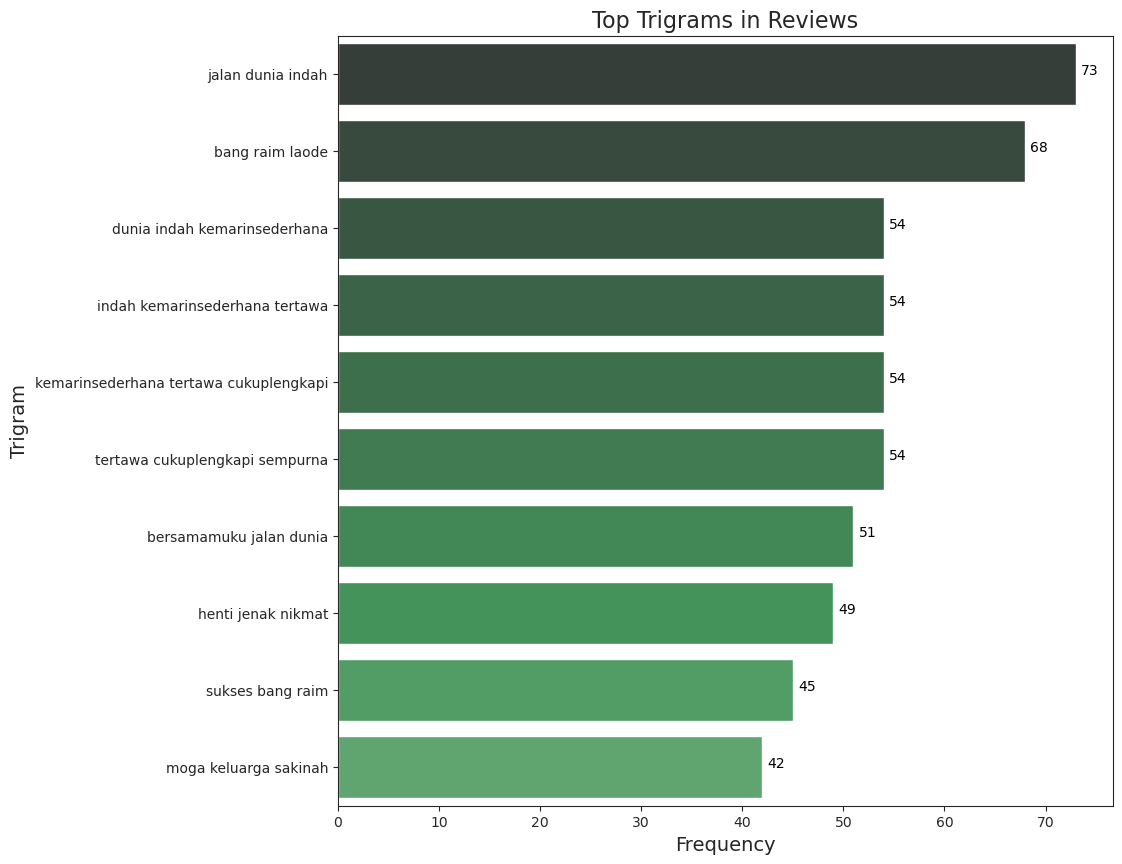

In [45]:
top_trigrams = df_trigram3.nlargest(10, 'Frequency')
plt.figure(figsize=(10,10))
sns.barplot(x=df_trigram2, y=df_trigram1, data=df_trigram3, palette= sns.color_palette("Greens_d", n_colors=15)[::-1])
plt.ylabel('Trigram', fontsize=14)
plt.xlabel('Frequency', fontsize=14)
plt.title('Top Trigrams in Reviews', fontsize=16)

# Give anotation number for every bar
for i, v in enumerate(top_trigrams['Frequency']):
    plt.text(v + 0.5, i, str(v), color='black', fontsize=10)
plt.savefig('top 15 trigrams.png', bbox_inches='tight')